In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import models
from keras import layers
from keras.preprocessing.image import ImageDataGenerator
from keras_preprocessing.image import img_to_array, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

import numpy as np
import matplotlib.pyplot as plt
import os


from numpy.random import seed
seed(1)
tf.random.set_seed(1) 

In [2]:
#Create our directory paths to our images
train_data_dir = 'data/train'
test_data_dir = 'data/test'
valid_data_dir = 'data/validation'

In [3]:
#Let's plot the number of images in each classification directory

def bar_plot(dir):
  x=len(os.listdir(dir+'/NORMAL'))
  y=len(os.listdir(dir+'/PNEUMONIA'))
  category = ['NORMAL', 'PNEUMONIA']
  count = [x, y]
  plot = plt.bar(category,count) 
  plot[0].set_color('orange')
  plt.title('Number of values for each category')
  plt.show()

Training images:

NORMAL: 1341
PNEUMONIA: 3875
Total Training images: 5216
*************************************************


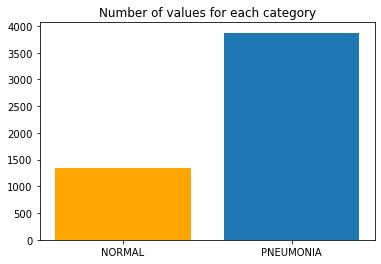

In [4]:
#Number of training images
print('Training images:\n')
print('NORMAL:', len(os.listdir(train_data_dir+'/NORMAL')))
print('PNEUMONIA:', len(os.listdir(train_data_dir+'/PNEUMONIA')))
print('Total Training images:', len(os.listdir(train_data_dir+'/NORMAL')) + len(os.listdir(train_data_dir+'/PNEUMONIA')))
print('*'*49)
bar_plot(train_data_dir)

Test images:

NORMAL: 234
PNEUMONIA: 390
Total Test images: 624
*************************************************


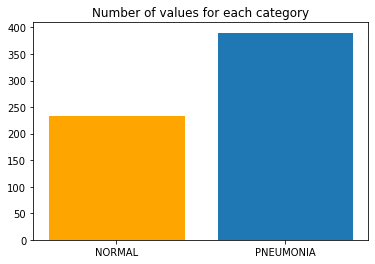

In [5]:
#Number of test images
print('Test images:\n')
print('NORMAL:', len(os.listdir(test_data_dir+'/NORMAL')))
print('PNEUMONIA:', len(os.listdir(test_data_dir+'/PNEUMONIA')))
print('Total Test images:', len(os.listdir(test_data_dir+'/NORMAL')) + len(os.listdir(test_data_dir+'/PNEUMONIA')))
print('*'*49)
bar_plot(test_data_dir)

Validation images:

NORMAL: 8
PNEUMONIA: 8
Total Validation images: 16
***********************************************


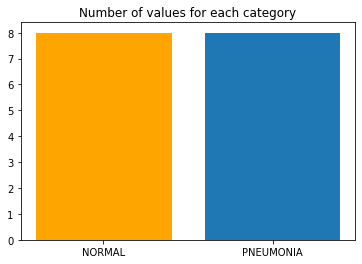

In [6]:
#Number of validation images
print('Validation images:\n')
print('NORMAL:', len(os.listdir(valid_data_dir+'/NORMAL')))
print('PNEUMONIA:', len(os.listdir(valid_data_dir+'/PNEUMONIA')))
print('Total Validation images:', len(os.listdir(valid_data_dir+'/NORMAL')) + len(os.listdir(valid_data_dir+'/PNEUMONIA')))
print('*'*47)
bar_plot(valid_data_dir)


In [7]:
# Get all the data in the directory data/train and reshape them

train_generator = ImageDataGenerator().flow_from_directory(
        train_data_dir, 
        target_size=(64, 64), 
        batch_size=5216)

Found 5216 images belonging to 2 classes.


In [8]:
# Get all the data in the directory data/test and reshape them

test_generator = ImageDataGenerator().flow_from_directory(
        test_data_dir, 
        target_size=(64, 64), 
        batch_size=624)

Found 624 images belonging to 2 classes.


In [9]:
# Get all the data in the directory data/validation and reshape them

val_generator = ImageDataGenerator().flow_from_directory(
    valid_data_dir, 
    target_size=(64, 64), 
    batch_size=16)

Found 16 images belonging to 2 classes.


In [10]:
#Create our different data sets

#Training set
X_train, y_train = next(train_generator)

#Test set
X_test, y_test = next(test_generator)

#Validation set
X_val, y_val = next(val_generator)

In [11]:
#Let's look at the shape of our data

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_val.shape)
print(y_val.shape)

(5216, 64, 64, 3)
(5216, 2)
(624, 64, 64, 3)
(624, 2)
(16, 64, 64, 3)
(16, 2)


#### Let's reshape our data ####

In [12]:
#X_train

In [13]:
#Reshaping our X_train data
X_train_unrow = X_train.reshape(5216, -1)
X_train_unrow.shape

(5216, 12288)

In [14]:
#Reshaping our X_test data
X_test_unrow = X_test.reshape(624, -1)
X_test_unrow.shape

(624, 12288)

In [15]:
#Taking a look at our y_train data
y_train

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [16]:
#Let's take a look at which index represents what class
train_generator.class_indices

{'normal': 0, 'pneumonia': 1}

In [17]:
y_train_final = y_train.T[[1]]
y_train_final.shape

(1, 5216)

In [18]:
y_train_final = y_train_final.reshape(5216, 1)
y_train_final.shape

(5216, 1)

In [19]:
#Let's reshape our y_test data
y_test_final = y_test.T[[1]]
y_test_final = y_test_final.reshape(624, 1)
y_test_final.shape

(624, 1)

In [20]:
#Reshaping our X_val and y_val data
X_val_final = X_val.reshape(16, -1)
X_val_final.shape

(16, 12288)

In [21]:
y_val_final = y_val.T[[1]]
y_val_final = y_val_final.reshape(16,1)
y_val_final.shape

(16, 1)

In [22]:
#Lastly let's normalize our data
X_train_final = X_train_unrow / 255
X_test_final = X_test_unrow / 255

In [23]:
print(X_train_final.shape)
print(y_train_final.shape)
print(X_test_final.shape)
print(y_test_final.shape)
print(X_val_final.shape)
print(y_val_final.shape)

(5216, 12288)
(5216, 1)
(624, 12288)
(624, 1)
(16, 12288)
(16, 1)


### Building Our Initial Model ###

In [24]:
model_1 = Sequential()
model_1.add(Dense(50, activation = 'relu', input_shape = (12288,)))
model_1.add(Dense(1, activation = 'sigmoid'))

In [25]:
model_1.compile(loss = 'binary_crossentropy', optimizer = 'sgd', metrics = ['acc'])

In [26]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                614450    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 614,501
Trainable params: 614,501
Non-trainable params: 0
_________________________________________________________________


In [27]:
results_1 = model_1.fit(X_train_final, y_train_final, epochs = 5, batch_size = 50, validation_data= (X_val_final, y_val_final))

Epoch 1/5
105/105 [==============================] - 1s 6ms/step - loss: 0.4905 - acc: 0.7678 - val_loss: 33.5508 - val_acc: 0.7500
Epoch 2/5
105/105 [==============================] - 0s 4ms/step - loss: 0.3346 - acc: 0.8641 - val_loss: 84.2330 - val_acc: 0.7500
Epoch 3/5
105/105 [==============================] - 0s 4ms/step - loss: 0.2689 - acc: 0.8923 - val_loss: 122.6993 - val_acc: 0.6875
Epoch 4/5
105/105 [==============================] - 0s 4ms/step - loss: 0.2280 - acc: 0.9107 - val_loss: 427.3762 - val_acc: 0.5000
Epoch 5/5
105/105 [==============================] - 0s 4ms/step - loss: 0.1984 - acc: 0.9237 - val_loss: 57.0925 - val_acc: 0.8750


In [28]:
train_loss, train_acc = model_1.evaluate(X_train_final, y_train_final)
print(f'Train Loss: {train_loss}')
print(f'Train Acc: {train_acc}')

163/163 [==============================] - 0s 2ms/step - loss: 0.1559 - acc: 0.9436
Train Loss: 0.1558886170387268
Train Acc: 0.9436349868774414


In [29]:
test_loss, test_acc = model_1.evaluate(X_test_final, y_test_final)
print(f'Test Loss: {test_loss}')
print(f'Test Acc: {test_acc}')

20/20 [==============================] - 0s 2ms/step - loss: 0.4760 - acc: 0.7756
Test Loss: 0.476045697927475
Test Acc: 0.7756410241127014


#### Loss and Accuracy Curves ####

In [30]:
def visualize_training_results(results):
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_acc'])
    plt.plot(history['acc'])
    plt.legend(['val_acc', 'acc'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()
    

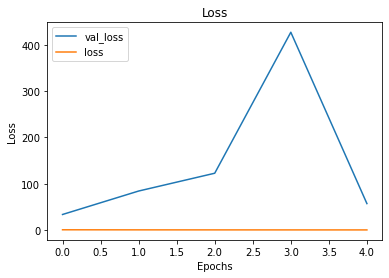

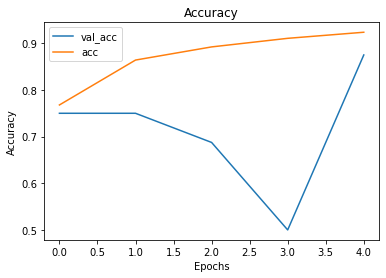

In [31]:
visualize_training_results(results_1)

### Model with More Layers ###

In [32]:
model_2 = Sequential()
model_2.add(Dense(50, activation = 'relu', input_shape = (12288,)))
model_2.add(Dense(35, activation = 'relu'))
model_2.add(Dense(25, activation = 'relu'))
model_2.add(Dense(15, activation = 'relu'))
model_2.add(Dense(1, activation = 'sigmoid'))

In [33]:
model_2.compile(loss = 'binary_crossentropy', optimizer = 'sgd', metrics = ['acc'])

In [34]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 50)                614450    
_________________________________________________________________
dense_3 (Dense)              (None, 35)                1785      
_________________________________________________________________
dense_4 (Dense)              (None, 25)                900       
_________________________________________________________________
dense_5 (Dense)              (None, 15)                390       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 16        
Total params: 617,541
Trainable params: 617,541
Non-trainable params: 0
_________________________________________________________________


In [35]:
results_2 = model_1.fit(X_train_final, y_train_final, epochs = 5, batch_size = 50, validation_data= (X_val_final, y_val_final))

Epoch 1/5
105/105 [==============================] - 0s 5ms/step - loss: 0.1958 - acc: 0.9227 - val_loss: 23.2553 - val_acc: 0.8125
Epoch 2/5
105/105 [==============================] - 0s 4ms/step - loss: 0.1689 - acc: 0.9331 - val_loss: 32.1544 - val_acc: 0.9375
Epoch 3/5
105/105 [==============================] - 0s 4ms/step - loss: 0.1787 - acc: 0.9304 - val_loss: 74.4096 - val_acc: 0.8125
Epoch 4/5
105/105 [==============================] - 0s 4ms/step - loss: 0.1581 - acc: 0.9408 - val_loss: 311.4004 - val_acc: 0.5625
Epoch 5/5
105/105 [==============================] - 0s 4ms/step - loss: 0.1426 - acc: 0.9446 - val_loss: 71.0697 - val_acc: 0.8125


In [36]:
train_loss, train_acc = model_2.evaluate(X_train_final, y_train_final)
print(f'Test Loss: {train_loss}')
print(f'Test Acc: {train_acc}')

163/163 [==============================] - 0s 2ms/step - loss: 0.6272 - acc: 0.7429
Test Loss: 0.6272055506706238
Test Acc: 0.7429064512252808


In [37]:
test_loss, test_acc = model_2.evaluate(X_test_final, y_test_final)
print(f'Test Loss: {test_loss}')
print(f'Test Acc: {test_acc}')

20/20 [==============================] - 0s 2ms/step - loss: 0.6722 - acc: 0.6250
Test Loss: 0.6721673011779785
Test Acc: 0.625


#### Loss and Accuracy Curves ####

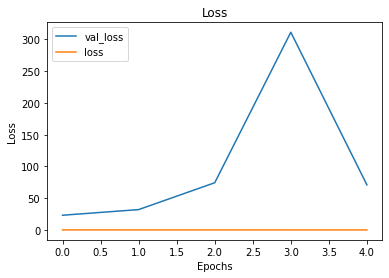

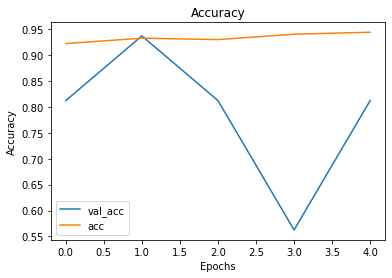

In [38]:
visualize_training_results(results_2)

### Model with more epochs ###

In [39]:
model_3 = Sequential()
model_3.add(Dense(50, activation = 'relu', input_shape = (12288,)))
model_3.add(Dense(35, activation = 'relu'))
model_3.add(Dense(25, activation = 'relu'))
model_3.add(Dense(15, activation = 'relu'))
model_3.add(Dense(1, activation = 'sigmoid'))

In [40]:
model_3.compile(loss = 'binary_crossentropy', optimizer = 'sgd', metrics = ['acc'])

In [41]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 50)                614450    
_________________________________________________________________
dense_8 (Dense)              (None, 35)                1785      
_________________________________________________________________
dense_9 (Dense)              (None, 25)                900       
_________________________________________________________________
dense_10 (Dense)             (None, 15)                390       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 16        
Total params: 617,541
Trainable params: 617,541
Non-trainable params: 0
_________________________________________________________________


In [42]:
results_3 = model_3.fit(X_train_final, y_train_final, epochs = 10, batch_size = 50, validation_data= (X_test_final, y_test_final))

Epoch 1/10
105/105 [==============================] - 1s 6ms/step - loss: 0.5123 - acc: 0.7356 - val_loss: 0.5175 - val_acc: 0.6314
Epoch 2/10
105/105 [==============================] - 0s 5ms/step - loss: 0.3965 - acc: 0.8267 - val_loss: 0.4305 - val_acc: 0.7949
Epoch 3/10
105/105 [==============================] - 0s 5ms/step - loss: 0.3271 - acc: 0.8664 - val_loss: 0.6671 - val_acc: 0.6923
Epoch 4/10
105/105 [==============================] - 0s 5ms/step - loss: 0.2936 - acc: 0.8790 - val_loss: 1.2557 - val_acc: 0.6362
Epoch 5/10
105/105 [==============================] - 0s 5ms/step - loss: 0.2395 - acc: 0.9039 - val_loss: 0.4976 - val_acc: 0.7708
Epoch 6/10
105/105 [==============================] - 0s 5ms/step - loss: 0.2289 - acc: 0.9109 - val_loss: 0.3775 - val_acc: 0.8253
Epoch 7/10
105/105 [==============================] - 0s 5ms/step - loss: 0.1922 - acc: 0.9256 - val_loss: 0.6984 - val_acc: 0.7372
Epoch 8/10
105/105 [==============================] - 0s 5ms/step - loss: 0.

In [43]:
train_loss, train_acc = model_3.evaluate(X_train_final, y_train_final)
print(f'Train Loss: {train_loss}')
print(f'Train Acc: {train_acc}')

163/163 [==============================] - 0s 2ms/step - loss: 0.1474 - acc: 0.9434
Train Loss: 0.1474204957485199
Train Acc: 0.943443238735199


In [44]:
test_loss, test_acc = model_3.evaluate(X_test_final, y_test_final)
print(f'Test Loss: {test_loss}')
print(f'Test Acc: {test_acc}')

20/20 [==============================] - 0s 2ms/step - loss: 0.4691 - acc: 0.8061
Test Loss: 0.4691232144832611
Test Acc: 0.8060897588729858


#### Loss and Accuracy Curves ####

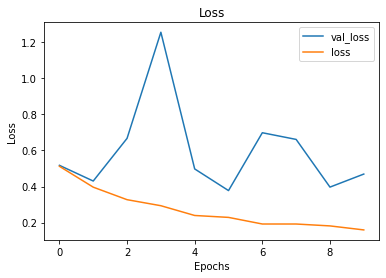

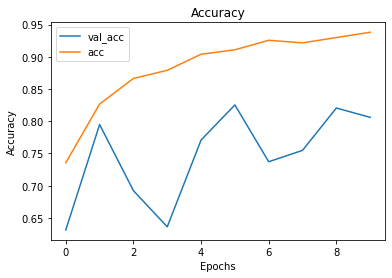

In [45]:
visualize_training_results(results_3)

### Let's Try a Different Approach and Build a CNN ###

In [46]:
# get all the data in the train directory 
train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        train_data_dir, 
        target_size=(64, 64), 
        batch_size = 5216, 
        class_mode='binary')

# get all the data in the test directory
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        train_data_dir, 
        target_size=(64, 64), 
        batch_size = 624,
        class_mode='binary') 


# get all the data in the val directory 
val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        valid_data_dir, 
        target_size=(64, 64),
        batch_size = 16,
        class_mode='binary')



Found 5216 images belonging to 2 classes.
Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [47]:
X_train, y_train = next(train_generator)
X_test, y_test = next(test_generator)
X_val, y_val = next(val_generator)

In [48]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(64 ,64,  3)))

model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (4, 4), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer="sgd",
              metrics=['acc'])

In [49]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(X_val, y_val))

Epoch 1/10
163/163 [==============================] - 15s 90ms/step - loss: 0.5676 - acc: 0.7408 - val_loss: 0.8662 - val_acc: 0.5000
Epoch 2/10
163/163 [==============================] - 14s 88ms/step - loss: 0.4948 - acc: 0.7573 - val_loss: 0.7752 - val_acc: 0.5625
Epoch 3/10
163/163 [==============================] - 14s 87ms/step - loss: 0.3635 - acc: 0.8466 - val_loss: 1.0313 - val_acc: 0.5625
Epoch 4/10
163/163 [==============================] - 14s 86ms/step - loss: 0.2539 - acc: 0.8924 - val_loss: 0.5717 - val_acc: 0.7500
Epoch 5/10
163/163 [==============================] - 14s 86ms/step - loss: 0.1922 - acc: 0.9239 - val_loss: 0.6136 - val_acc: 0.6250
Epoch 6/10
163/163 [==============================] - 14s 88ms/step - loss: 0.1699 - acc: 0.9308 - val_loss: 0.7932 - val_acc: 0.5625
Epoch 7/10
163/163 [==============================] - 14s 87ms/step - loss: 0.1467 - acc: 0.9440 - val_loss: 0.6881 - val_acc: 0.6250
Epoch 8/10
163/163 [==============================] - 15s 89ms

In [50]:
train_loss, train_acc = model.evaluate(X_train, y_train)
print(f'Train Loss: {train_loss}')
print(f'Train Acc: {train_acc}')

163/163 [==============================] - 3s 16ms/step - loss: 0.1058 - acc: 0.9605
Train Loss: 0.1058100014925003
Train Acc: 0.9605061411857605


In [51]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Acc: {test_acc}')

20/20 [==============================] - 0s 15ms/step - loss: 0.1012 - acc: 0.9583
Test Loss: 0.1011703610420227
Test Acc: 0.9583333134651184


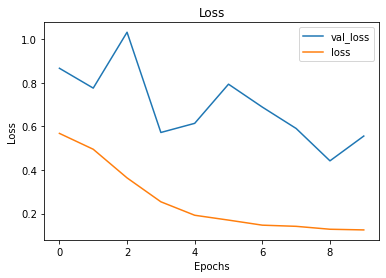

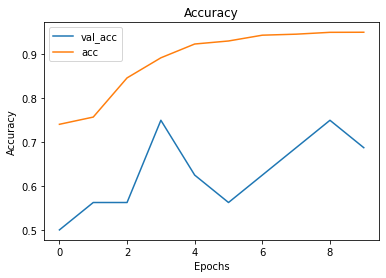

In [52]:
visualize_training_results(history)

#### Let's add dropout regularization ####

In [53]:
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(64 ,64,  3)))

model2.add(layers.MaxPooling2D((2, 2)))


model2.add(Dropout(0.4))
model2.add(layers.Conv2D(32, (4, 4), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))

model2.add(Dropout(0.4))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))


model2.add(layers.Flatten())
model2.add(layers.Dense(64, activation='relu'))
model2.add(Dropout(0.2))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.compile(loss='binary_crossentropy',
              optimizer="sgd",
              metrics=['acc'])

In [54]:
history = model2.fit(X_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(X_val, y_val))

Epoch 1/10
163/163 [==============================] - 18s 108ms/step - loss: 0.5626 - acc: 0.7396 - val_loss: 0.6999 - val_acc: 0.5000
Epoch 2/10
163/163 [==============================] - 17s 102ms/step - loss: 0.5004 - acc: 0.7592 - val_loss: 0.6855 - val_acc: 0.5625
Epoch 3/10
163/163 [==============================] - 17s 103ms/step - loss: 0.4300 - acc: 0.8066 - val_loss: 0.6308 - val_acc: 0.6250
Epoch 4/10
163/163 [==============================] - 17s 102ms/step - loss: 0.3751 - acc: 0.8292 - val_loss: 0.5974 - val_acc: 0.6875
Epoch 5/10
163/163 [==============================] - 17s 103ms/step - loss: 0.3132 - acc: 0.8658 - val_loss: 0.5672 - val_acc: 0.7500
Epoch 6/10
163/163 [==============================] - 17s 102ms/step - loss: 0.2955 - acc: 0.8729 - val_loss: 0.5726 - val_acc: 0.6875
Epoch 7/10
163/163 [==============================] - 17s 104ms/step - loss: 0.2702 - acc: 0.8840 - val_loss: 0.5178 - val_acc: 0.7500
Epoch 8/10
163/163 [==============================] - 1

In [55]:
train_loss, train_acc = model2.evaluate(X_train, y_train)
print(f'Train Loss: {train_loss}')
print(f'Train Acc: {train_acc}')

163/163 [==============================] - 3s 17ms/step - loss: 0.3289 - acc: 0.8790
Train Loss: 0.32887351512908936
Train Acc: 0.8790260553359985


In [56]:
test_loss, test_acc = model2.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Acc: {test_acc}')

20/20 [==============================] - 0s 15ms/step - loss: 0.3231 - acc: 0.8894
Test Loss: 0.3230961561203003
Test Acc: 0.8894230723381042


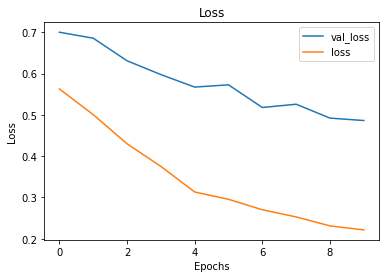

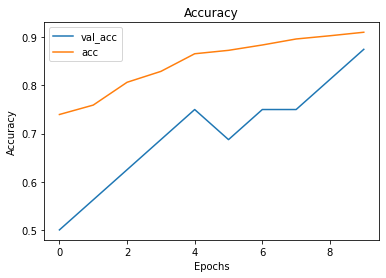

In [57]:
visualize_training_results(history)